In [1]:
# Import Dependencies
%matplotlib inline
import itertools

# Start Python Imports
import math, time, random, datetime
import pickle # or `import dill as pickle`, if you're using the dill package
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv


from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)


%matplotlib inline


In [2]:
dtype = {'Store':'uint8','Sales':'uint8','DayOfWeek':'uint8','Customers':'uint8','Open':'uint8','Promo':'uint8'
        ,'StateHoliday':'uint8','SchoolHoliday':'uint8','StoreType':'uint8','Assortment':'uint8',
       'CompetitionDistance':'float32', 'CompetitionOpenSinceMonth':'float32','CompetitionOpenSinceYear':'float32',
       'Promo2':'uint8','Promo2SinceWeek':'float32','PromoInterval':'uint8'}


In [3]:
train_store = pd.read_csv('/home/david/Desktop/Rossmann-Store-Sales/train_store.csv', dtype=dtype)

In [4]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,143,43,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,156,34,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,174,11,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,147,48,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,214,100,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0.0,0


In [5]:
export_csv = train_store.to_csv (r'C:\Users\David\Desktop\Rossmann-Store-Sales\train_store.csv', index = None, header=True) 


To get more information about a new modules you have imported, run the cell below. A window containing a description of the module will appear! This provides details on the module parameters and attributes and links for further references. Try it out!

In [6]:
print(train_store.columns[0:120])

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [7]:
test = pd.read_csv('/home/david/Desktop/Rossmann-Store-Sales/test.csv')

## Checking features for Multicollinearity
Before we get run our model, let's make sure we are not including unnecessary features. A great way to do this is using a correlation plot, because for both linear regression and decision trees we do not want to include correlated features.

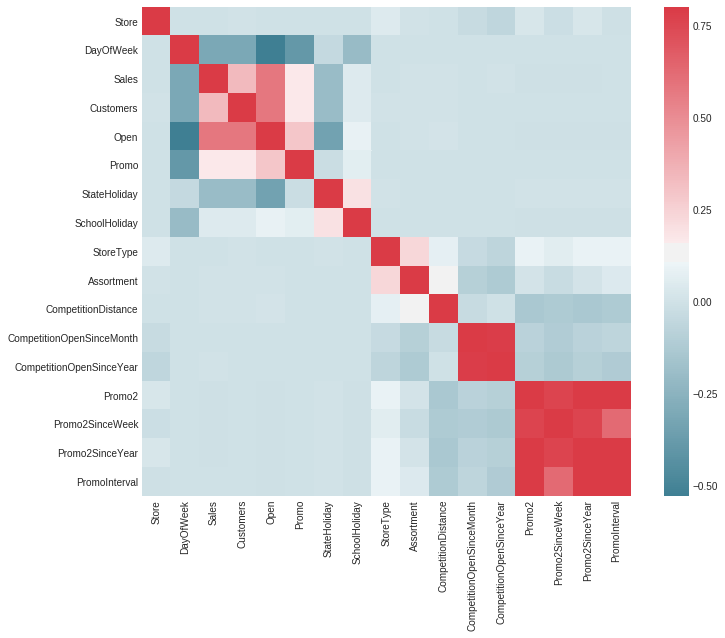

In [8]:
# Compute the correlation matrix
corrmat  = train_store.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap using seaborn
sns.heatmap(corrmat, cmap=cmap, vmax=.8, square=True)

## When we build a correlation plot we are are checking for multicollinearity!
The plot above is a way to check for multicollinearity. Multicollinearity is a problem when we have highly correlated explanatory features, as this makes it difficult for the model to try to differentitae between each feature's influence on the explanatory feature.

In the code below, instead of plotting the correlation matrix, we filter to only the top abs correlations that are not one. This will help us isolate the interactions that are most problematic.

In [9]:
# def get_redundant_pairs(df):
#     '''Get diagonal and lower triangular pairs of correlation matrix'''
#     pairs_to_drop = set()
#     cols = df.columns
#     for i in range(0, df.shape[1]):
#         for j in range(0, i+1):
#             pairs_to_drop.add((cols[i], cols[j]))
#     return pairs_to_drop

# def get_top_abs_correlations(df, n=5):
#     au_corr = df.corr().abs().unstack()
#     labels_to_drop = get_redundant_pairs(df)
#     au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
#     return au_corr[0:n]

# print("Top Absolute Correlations")
# print(get_top_abs_correlations(train_store, 20))

In [10]:
del train_store['Promo2SinceYear']

In [11]:
new_df= train_store

In [12]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval
0,1,5,2015-07-31,143,43,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0
1,1,4,2015-07-30,156,34,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0
2,1,3,2015-07-29,174,11,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0
3,1,2,2015-07-28,147,48,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0
4,1,1,2015-07-27,214,100,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0


In [13]:
new_df['year'] = pd.DatetimeIndex(new_df['Date']).year
new_df['month'] = pd.DatetimeIndex(new_df['Date']).month
new_df['day'] = pd.DatetimeIndex(new_df['Date']).day
new_df['week'] = pd.DatetimeIndex(new_df['Date']).week
#train_store['dayofweek'] = pd.DatetimeIndex(train_store['Date']).dayofweek









In [14]:
dtype = {'year':'uint8','month':'uint8','day':'uint8','week':'uint8'}

In [15]:
del new_df['Date']


# Splitting into train and test¶

## X_train, y_train, X_test, y_test

In [16]:
print(new_df.columns)

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'PromoInterval', 'year', 'month', 'day', 'week'],
      dtype='object')


In [17]:
train, test = train_test_split(new_df, test_size=0.2, random_state=42)
len(train)
len(test)

203442

In [18]:
len(train)

813767

In [19]:

# create a training array = all the features but not the target and a training test array = the results of the target variable for the training array
new_dfY = new_df['Sales']
new_dfX = new_df.drop('Sales', axis=1)

In [20]:

X_train, X_test, y_train, y_test = train_test_split(new_dfX, new_dfY, test_size=0.2, random_state=42)

len(X_train)
len(X_test)
len(y_train)
len(y_test)

203442

In [21]:
len(X_test)


203442

In [22]:
len(y_train)


813767

In [23]:
len(y_test)

203442

In [24]:
len(y_train)

813767

# Decision Tree and Random Forest

In [25]:
#Date=new_df['Date']


#date_df=pd.DataFrame({"year": Date.dt.year,
 #             "month": Date.dt.month,
  #            "day": Date.dt.day,
              #"hour": Date.dt.hour,
              #"dayofyear": Date.dt.dayofyear,
   #                  "Date":Date.dt.date,
    #          "week": Date.dt.week,
              #"weekofyear": Date.dt.weekofyear,
      #        "dayofweek": Date.dt.dayofweek,
     #         #"weekday": Date.dt.weekday,
              #"quarter": Date.dt.quarter,
                      
       #      })

In [26]:
#date_df.head()

In [27]:
#train_store.dtypes

In [28]:
train_store = train_store[train_store.Sales!= 0]

In [29]:
train_store.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval,year,month,day,week
0,1,5,143,43,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,31,31
1,1,4,156,34,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,30,31
2,1,3,174,11,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,29,31
3,1,2,147,48,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,28,31
4,1,1,214,100,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,27,31
6,1,6,12,244,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,25,30
7,1,5,122,203,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,24,30
8,1,4,185,247,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,23,30
9,1,3,136,207,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,22,30
10,1,2,230,213,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,21,30


In [30]:
#dtype={'Date':int}

In [31]:
#date_df['Date']=pd.to_datetime(date_df['Date'],dayfirst=False)

In [32]:
#date_df.dtypes

In [33]:
#dtype={'Date':int}

In [34]:
#date_df.dtypes

In [35]:
#train_store['year'] = pd.DatetimeIndex(train_store['Date']).year
#train_store['month'] = pd.DatetimeIndex(train_store['Date']).month
#train_store['day'] = pd.DatetimeIndex(train_store['Date']).day
#train_store['week'] = pd.DatetimeIndex(train_store['Date']).week
#train_store['dayofweek'] = pd.DatetimeIndex(train_store['Date']).dayofweek




train_store.tail()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval,year,month,day,week
1017202,91,1,249,215,1,1,0,1,4,3,5350.0,0.0,0.0,1,22.0,3,2013,1,7,2
1017204,91,6,163,83,1,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,3,2013,1,5,1
1017205,91,5,188,70,1,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,3,2013,1,4,1
1017206,91,4,201,44,1,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,3,2013,1,3,1
1017207,91,3,113,49,1,0,0,1,4,3,5350.0,0.0,0.0,1,22.0,3,2013,1,2,1


In [36]:
#train_store['Date'].astype(int)


In [37]:
#date_df['Date'].astype(int)

In [38]:
#train_date = pd.merge(train_store, date_df, on="Date", how="left")
#train_date.head()

In [39]:
#train_date = pd.concat([train_store, Date]).sort_values('Date').reset_index(drop=True)

In [40]:
#del train_store['Date']


In [41]:
train_store.head(10)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval,year,month,day,week
0,1,5,143,43,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,31,31
1,1,4,156,34,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,30,31
2,1,3,174,11,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,29,31
3,1,2,147,48,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,28,31
4,1,1,214,100,1,1,0,1,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,27,31
6,1,6,12,244,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,25,30
7,1,5,122,203,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,24,30
8,1,4,185,247,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,23,30
9,1,3,136,207,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,22,30
10,1,2,230,213,1,0,0,0,3,1,1270.0,9.0,2008.0,0,0.0,0,2015,7,21,30


In [42]:

# we can count the actual memory usage using the following command
#train_store.info(memory_usage='deep')


In [43]:
 #we can check how much space each column is actually taking
# the numbers are in bytes, not kilobytes
#train_store.memory_usage(deep=True)

In [44]:
#train_store.dtypes

In [45]:
# train_store.memory_usage(deep=True) / 1024 ** 2

By setting deep=True we obtain the exact memory size (Mb), leaving the option to default False would present an approximation. It is clear at first sight that the majority of the memory is used for storing strings and that is also where we can gain most from optimisation. For convenience I define a helper function for evaluating the size (in Mb) of the entire DataFrame.

In [46]:
#def memory_usage(train_store):
 #   return(round(train_store.memory_usage(deep=True).sum() / 1024 ** 2, 2))

In [47]:
#train_store.Sales =train_store.Sales.astype('uint8')
#print('Memory used:', memory_usage(train_store), 'Mb')

In [48]:
#def memory_usage(train_store):
#    return(round(train_store.memory_usage(deep=True).sum() / 1024 ** 2, 2))

And let’s see how much in total the DataFrame takes:

In [49]:
#print('Memory used:', memory_usage(train_store), 'Mb')

In [50]:
#train_store.day_of_week = train_store.day_of_week.astype('category')
#train_store.Sales = train_store.Sales.astype('uint32')

#train_store.Sales = train_store.Sales.astype('uint32')

#train_store.Store = train_store.Store.astype('uint32')
#train_store.DayOfWeek = train_store.DayOfWeek.astype('uint32')
#train_store.Date = train_store.Date.astype('uint32')
#train_store.Sales = train_store.Sales.astype('uint32')
#train_store.Customers = train_store.Customers.astype('uint32')
#train_store.Open = train_store.Open.astype('uint32')
#train_store.Promo = train_store.Promo.astype('uint32')
#train_store.StateHoliday = train_store.StateHoliday.astype('uint32')


#train_store.SchoolHoliday = train_store.SchoolHoliday.astype('uint32')
#train_store.StoreType = train_store.StoreType.astype('uint32')
#train_store.Assortment = train_store.Assortment.astype('uint32')
#train_store.CompetitionDistance = train_store.CompetitionDistance.astype('float64')


#train_store.CompetitionOpenSinceMonth = train_store.CompetitionOpenSinceMonth.astype('float64')
#train_store.CompetitionOpenSinceYear = train_store.CompetitionOpenSinceYear.astype('float64')
#train_store.Promo2 = train_store.Promo2.astype('uint32')
#train_store.Promo2SinceWeek = train_store.Promo2SinceWeek.astype('float64')


#train_store.Promo2SinceYear = train_store.Promo2SinceYear.astype('float16')
#train_store.PromoInterval = train_store.PromoInterval.astype('uint32')




In [51]:
#print('Memory used:', memory_usage(train_store), 'Mb')

In [52]:
#train_store.memory_usage(deep=True) / 1024 ** 2


In [53]:
#type(train_store.memory_usage(deep=True))


In [54]:
# since it is a series, we can use .sum()
#train_store.memory_usage(deep=True).sum()

In [55]:
test.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval,year,month,day,week
76435,84,1,144,253,1,0,0,1,1,3,11810.0,8.0,2014.0,0,0.0,0,2013,10,28,44
923026,245,6,145,232,1,0,0,0,1,1,630.0,2.0,2015.0,1,31.0,2,2015,5,9,19
731180,35,5,255,203,1,0,0,0,4,1,1760.0,0.0,0.0,1,10.0,3,2015,2,13,7
790350,99,4,71,137,1,1,0,0,4,3,21810.0,9.0,2012.0,0,0.0,0,2013,2,21,8
252134,22,6,228,152,1,0,0,0,1,3,9260.0,2.0,2010.0,0,0.0,0,2014,12,27,52


In [56]:
#forest.fit(X_train, y_train)


#print('Score: ', forest.score(X_train, y_train))

In [57]:
#print(forest.oob_score_)

In [58]:
#print('Score: ', forest.score(X_test, y_test))


In [59]:
#train_store = train_store.dropna()

In [60]:
train_store.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 841037 entries, 0 to 1017207
Data columns (total 20 columns):
Store                        841037 non-null uint8
DayOfWeek                    841037 non-null uint8
Sales                        841037 non-null uint8
Customers                    841037 non-null uint8
Open                         841037 non-null uint8
Promo                        841037 non-null uint8
StateHoliday                 841037 non-null uint8
SchoolHoliday                841037 non-null uint8
StoreType                    841037 non-null uint8
Assortment                   841037 non-null uint8
CompetitionDistance          841037 non-null float32
CompetitionOpenSinceMonth    841037 non-null float32
CompetitionOpenSinceYear     841037 non-null float32
Promo2                       841037 non-null uint8
Promo2SinceWeek              841037 non-null float32
PromoInterval                841037 non-null uint8
year                         841037 non-null int64
month        

In [61]:
train_store.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 841037 entries, 0 to 1017207
Data columns (total 20 columns):
Store                        841037 non-null uint8
DayOfWeek                    841037 non-null uint8
Sales                        841037 non-null uint8
Customers                    841037 non-null uint8
Open                         841037 non-null uint8
Promo                        841037 non-null uint8
StateHoliday                 841037 non-null uint8
SchoolHoliday                841037 non-null uint8
StoreType                    841037 non-null uint8
Assortment                   841037 non-null uint8
CompetitionDistance          841037 non-null float32
CompetitionOpenSinceMonth    841037 non-null float32
CompetitionOpenSinceYear     841037 non-null float32
Promo2                       841037 non-null uint8
Promo2SinceWeek              841037 non-null float32
PromoInterval                841037 non-null uint8
year                         841037 non-null int64
month        

### Define a function to fit machine learning algorithms

### Voting Methode

### Bagging

In [127]:

%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier

import itertools
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [128]:
# Split into two sets
y = train_store['Sales'] 
X = train_store.drop('Sales', 1)

In [130]:
seed = 1075
np.random.seed(seed)
# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
        max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=5, 
       n_jobs=-1)
    
    print ('Mean of: {1:.3f}, std: (+/-) {2:.3f [{0}]' 
                       .format(clf.__class__.__name__, 
                       vanilla_scores.mean(), vanilla_scores.std()))
    print ('Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n'
                       .format(clf.__class__.__name__, 
                        bagging_scores.mean(), bagging_scores.std()))

MemoryError: could not allocate 2139095040 bytes

### Voting 

In [64]:
# Example of hard voting 
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print('Accuracy: %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), label))

NameError: name 'rf' is not defined

### Boosting 

In [110]:
import xgboost

from xgboost.sklearn import XGBClassifier  
from xgboost.sklearn import XGBRegressor

In [112]:
from mlxtend.classifier import EnsembleVoteClassifier


In [125]:
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()
boost_array = [ada_boost, grad_boost, xgb_boost]
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print('Mean: {0:.3f}, std: (+/-) {1:.3f} [{2}]'.format(scores.mean(), scores.std(), label))

NameError: name 'XGBClassifier' is not defined

### Stacking

In [121]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
names = ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier']
def zip_stacked_classifiers(*args):
    to_zip = []
    for arg in args:
        combined_items = sum([map(list, combinations(arg, i)) for i in range(len(arg) + 1)], [])
        combined_items = filter(lambda x: len(x) > 0, combined_items)
        to_zip.append(combined_items)
    
    return zip(to_zip[0], to_zip[1])
stacked_clf_list = zip_stacked_classifiers(clf_array, names)
best_combination = [0.00, ""]
for clf in stacked_clf_list:
    
    ensemble = SuperLearner(scorer = accuracy_score, 
                            random_state = seed, 
                            folds = 10)
    ensemble.add(clf[0])
    ensemble.add_meta(lr)
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)
    accuracy = accuracy_score(preds, y_test)
    
    if accuracy > best_combination[0]:
        best_combination[0] = accuracy
        best_combination[1] = clf[1]
    
    print("Accuracy score: {:.3f} {}").format(accuracy, clf[1])
print("\nBest stacking model is {} with accuracy of: {:.3f}").format(best_combination[1], best_combination[0])

TypeError: can only concatenate list (not "map") to list